## Построение модели Альтмана
Для отобранных данных построим модель Альтмана-Сабато с оригинальными коэффициентами



In [ ]:
#Импортируем необходимые библиотеки

import math
import numpy as np # Линейная алгебра и многомерные массивы
import pandas as pd # Работа с таблицами данных
import matplotlib.pyplot as plt # Графическая библиотека
from ipywidgets import widgets, interact # Интерактивные виджеты

# Техническая функция. Иногда потребуется сравнивать два float числа на равенство
def is_equal(x, y):
    return abs(x-y) < 1e-6

# Считывание и предобработка данных

Считываем данные об отчетостях по всем компаниям за 2018-2022 год:

In [ ]:
data_frame = pd.read_excel("/content/drive/MyDrive/ИПС/Данные/Итог.xlsx")

In [ ]:
data_frame.columns

Index(['Наименование', 'Регистрационный номер',
       '2018, Среднесписочная численность работников',
       '2019, Среднесписочная численность работников',
       '2020, Среднесписочная численность работников',
       '2021, Среднесписочная численность работников',
       '2022, Среднесписочная численность работников',
       '2018, Денежные средства и денежные эквиваленты, RUB',
       '2019, Денежные средства и денежные эквиваленты, RUB',
       '2020, Денежные средства и денежные эквиваленты, RUB',
       '2021, Денежные средства и денежные эквиваленты, RUB',
       '2022, Денежные средства и денежные эквиваленты, RUB',
       '2018, Активы  всего, RUB', '2019, Активы  всего, RUB',
       '2020, Активы  всего, RUB', '2021, Активы  всего, RUB',
       '2022, Активы  всего, RUB', '2018, Краткосрочные обязательства, RUB',
       '2019, Краткосрочные обязательства, RUB',
       '2020, Краткосрочные обязательства, RUB',
       '2021, Краткосрочные обязательства, RUB',
       '2022, Кра

Могут возникнуть проблемы с численностью работников, поэтому в тем случаях, когда значение не выражено конкретным числом, заменим его на среднее значение концов указаного промежутка

In [ ]:
for index, row in data_frame.iterrows():
    if isinstance(row["2018, Среднесписочная численность работников"], str):
        if "-" in row["2018, Среднесписочная численность работников"]:
            min_val, max_val = row["2018, Среднесписочная численность работников"].split("-")
            avg_val = (int(min_val.replace(" ", "")) + int(max_val.replace(" ", ""))) / 2
            data_frame.at[index, "2018, Среднесписочная численность работников"] = avg_val
        else:
            data_frame.at[index, "2018, Среднесписочная численность работников"] = float(row["2018, Среднесписочная численность работников"].replace(" ", ""))

    if isinstance(row["2019, Среднесписочная численность работников"], str):
        if "-" in row["2019, Среднесписочная численность работников"]:
            min_val, max_val = row["2019, Среднесписочная численность работников"].split("-")
            avg_val = (int(min_val.replace(" ", "")) + int(max_val.replace(" ", ""))) / 2
            data_frame.at[index, "2019, Среднесписочная численность работников"] = avg_val
        else:
            data_frame.at[index, "2019, Среднесписочная численность работников"] = float(row["2019, Среднесписочная численность работников"].replace(" ", ""))

    if isinstance(row["2020, Среднесписочная численность работников"], str):
        if "-" in row["2020, Среднесписочная численность работников"]:
            min_val, max_val = row["2020, Среднесписочная численность работников"].split("-")
            avg_val = (int(min_val.replace(" ", "")) + int(max_val.replace(" ", ""))) / 2
            data_frame.at[index, "2020, Среднесписочная численность работников"] = avg_val
        else:
            data_frame.at[index, "2020, Среднесписочная численность работников"] = float(row["2020, Среднесписочная численность работников"].replace(" ", ""))

    if isinstance(row["2021, Среднесписочная численность работников"], str):
        if "-" in row["2021, Среднесписочная численность работников"]:
            min_val, max_val = row["2021, Среднесписочная численность работников"].split("-")
            avg_val = (int(min_val.replace(" ", "")) + int(max_val.replace(" ", ""))) / 2
            data_frame.at[index, "2021, Среднесписочная численность работников"] = avg_val
        else:
            data_frame.at[index, "2021, Среднесписочная численность работников"] = float(row["2021, Среднесписочная численность работников"].replace(" ", ""))

    if isinstance(row["2022, Среднесписочная численность работников"], str):
        if "-" in row["2022, Среднесписочная численность работников"]:
            min_val, max_val = row["2022, Среднесписочная численность работников"].split("-")
            avg_val = (int(min_val.replace(" ", "")) + int(max_val.replace(" ", ""))) / 2
            data_frame.at[index, "2022, Среднесписочная численность работников"] = avg_val
        else:
            data_frame.at[index, "2022, Среднесписочная численность работников"] = float(row["2022, Среднесписочная численность работников"].replace(" ", ""))

Компании были изначально выбраны по выручке (критерий компаний-МСП), но не были отобраны по количеству работников. Выберем для дальнейшего анализа только те компании, к

In [ ]:
rows_to_keep = []

for index, row in data_frame.iterrows():
    if (
        100 <= float(row["2018, Среднесписочная численность работников"]) <= 250 and
        100 <= float(row["2019, Среднесписочная численность работников"]) <= 250 and
        100 <= float(row["2020, Среднесписочная численность работников"]) <= 250 and
        100 <= float(row["2021, Среднесписочная численность работников"]) <= 250 and
        100 <= float(row["2022, Среднесписочная численность работников"]) <= 250
    ):
        rows_to_keep.append(index)

filtered_data_frame = data_frame.loc[rows_to_keep]
filtered_data_frame.to_excel("/content/drive/MyDrive/ИПС/Данные/Итог_для_Альтмана.xlsx", index=False)

In [ ]:
filtered_data_frame

,Наименование,Регистрационный номер,"2018, Среднесписочная численность работников","2019, Среднесписочная численность работников","2020, Среднесписочная численность работников","2021, Среднесписочная численность работников","2022, Среднесписочная численность работников","2018, Денежные средства и денежные эквиваленты, RUB","2019, Денежные средства и денежные эквиваленты, RUB","2020, Денежные средства и денежные эквиваленты, RUB",...,"2020, Чистая прибыль (убыток), RUB","2021, Чистая прибыль (убыток), RUB","2022, Чистая прибыль (убыток), RUB","2018, EBIT, RUB","2019, EBIT, RUB","2020, EBIT, RUB","2021, EBIT, RUB","2022, EBIT, RUB",№,index_column
218,"НПП ОСТ, ЗАО",1027809178870,196.0,191,174,142,124.0,55520000.0,73686000.0,69307000.0,...,-5.718000e+06,-5812000.0,573000.0,2.318000e+06,4761000.0,-7641000.0,-6547000.0,-820000.0,NaN,218
293,"АСИНОВСКАЯ ЛЕСОПРОМЫШЛЕННОСТЬ, ООО",1107025000202,158.0,195,170,155,153.0,1694000.0,954000.0,1554000.0,...,-1.575910e+08,-74873000.0,-182322000.0,-1.865250e+08,-14335000.0,-178413000.0,-76119000.0,-35265000.0,NaN,293
431,"АГРОФИРМА ГОРДИНО, ОАО",1024300966910,129.0,111,109,101,118.0,1154000.0,3665000.0,2624000.0,...,6.022000e+06,1952000.0,10631000.0,4.544000e+06,4387000.0,7442000.0,4911000.0,13189000.0,NaN,431
513,"СТРОЙТРАНС, ООО",1076217000090,118.0,110,112,106,101.0,97000.0,110000.0,38000.0,...,8.030000e+05,846000.0,-7928000.0,8.330000e+05,990000.0,1004000.0,1057000.0,276000.0,NaN,513
594,"БИОНЕТ, АО",1092920000876,193.0,206,186,158,146.0,61177000.0,7967000.0,25873000.0,...,-1.040120e+09,-10848000.0,82660000.0,-1.260066e+09,90199000.0,-968536000.0,-11081000.0,108190000.0,NaN,594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160938,"РОСЭК, ООО",1106659003065,150.0,154.0,154.0,126.0,122.0,114000.0,2514000.0,468000.0,...,8.640000e+06,10067000.0,36545000.0,5.922300e+07,67157000.0,46584000.0,49112000.0,79375000.0,NaN,160938
160949,"АМД ТРАНСПОРТ, ООО",1067847751322,147.0,182.0,180.0,196.0,194.0,119812000.0,23391000.0,1045000.0,...,1.850300e+07,64772000.0,62309000.0,-2.742000e+06,13798000.0,32810000.0,91740000.0,104211000.0,NaN,160949
160960,"ИСТКУЛЬТ МОЖАЙСК, АО",1045005402463,125.0,125.0,127.0,123.0,125.0,59614000.0,53534000.0,213059000.0,...,-6.994500e+07,257721000.0,405063000.0,-1.588480e+08,143629000.0,-59781000.0,335590000.0,500662000.0,NaN,160960
160962,"ДЗГУ, ООО",1035001619135,145.0,152.0,167.0,174.0,179.0,1013000.0,2855000.0,558000.0,...,9.983000e+06,33159000.0,148098000.0,6.457000e+06,5880000.0,14643000.0,60608000.0,210097000.0,NaN,160962


# Расчет значений для модели Альтмана-Сабато

In [ ]:
def calculate_x1(row, year):
    profit_key = f'{year}, Прибыль (убыток) до налогообложения , RUB'
    interest_payable_key = f'{year}, Проценты к уплате, RUB'
    interest_receivable_key = f'{year}, Проценты к получению, RUB'
    total_assets_key = f'{year}, Активы  всего, RUB'
    if np.isnan(row[profit_key]) or np.isnan(row[interest_payable_key]) or np.isnan(row[interest_receivable_key]) or np.isnan(row[total_assets_key]):
      return np.nan
    return (row[profit_key] + row[interest_payable_key] - row[interest_receivable_key]) / row[total_assets_key]



def calculate_x2(row, year):
    short_term_liabilities_key = f'{year}, Краткосрочные обязательства, RUB'
    total_assets_key = f'{year}, Активы  всего, RUB'
    if  row[short_term_liabilities_key] / row[total_assets_key] < 0 :
      return None #если х2 < 0 -> убираем
    if np.isnan(row[short_term_liabilities_key]) or np.isnan(row[total_assets_key]):
      return np.nan
    return row[short_term_liabilities_key] / row[total_assets_key]



def calculate_x3(row, year):
    net_profit_key = f'{year}, Чистая прибыль (убыток), RUB'
    total_assets_key = f'{year}, Активы  всего, RUB'
    if np.isnan(row[net_profit_key]) or np.isnan(row[total_assets_key]):
      return np.nan
    return row[net_profit_key] / row[total_assets_key]


def calculate_x4(row, year):
    cash_and_equivalents_key = f'{year}, Денежные средства и денежные эквиваленты, RUB'
    total_assets_key = f'{year}, Активы  всего, RUB'
    if np.isnan(row[cash_and_equivalents_key]) or np.isnan(row[total_assets_key]):
      return np.nan
    return row[cash_and_equivalents_key] / row[total_assets_key]


def calculate_x5(row, year):
    profit_before_tax_key = f'{year}, Прибыль (убыток) до налогообложения , RUB'
    interest_payable_key = f'{year}, Проценты к уплате, RUB'
    interest_receivable_key = f'{year}, Проценты к получению, RUB'
    if np.isnan(row[profit_before_tax_key]) or np.isnan(row[interest_payable_key]) or np.isnan(row[interest_receivable_key]):
      return np.nan
    return ((row[profit_before_tax_key]) /
                row[interest_payable_key])



def calculate_altman(x1, x2, x3, x4, x5):
  if x5<0 or (1-x1)<0 or x2<0 or (1-x3)<0 or x4<0:
    return np.nan
  return (53.48 - 4.09*math.log(1-x1) - 1.13*math.log(x2) - 4.33*math.log(1-x3) + 1.84*math.log(x4) + 1.97*math.log(x5)) #сделать логарифмическую



years = range(2018, 2023)
data = {}
data = pd.DataFrame(data)


for year in range(2018, 2023):
    data[f'x1_{year}'] = filtered_data_frame.apply(lambda row: calculate_x1(row, year), axis=1)
    data[f'x2_{year}'] = filtered_data_frame.apply(lambda row: calculate_x2(row, year), axis=1)
    data[f'x3_{year}'] = filtered_data_frame.apply(lambda row: calculate_x3(row, year), axis=1)
    data[f'x4_{year}'] = filtered_data_frame.apply(lambda row: calculate_x4(row, year), axis=1)
    data[f'x5_{year}'] = filtered_data_frame.apply(lambda row: calculate_x5(row, year), axis=1)

    data[f'result_{year}'] = data.apply(lambda row: calculate_altman(row[f'x1_{year}'], row[f'x2_{year}'], row[f'x3_{year}'], row[f'x4_{year}'], row[f'x5_{year}']), axis=1)



    #a = 1 - np.longdouble(1/(1 + np.exp((-1)*a.values)))

    #data[f'result_{year}'] = a #попробуем с

original_df = pd.DataFrame(data)
original_df['index_column'] = original_df.index
original_df

,x1_2018,x2_2018,x3_2018,x4_2018,x5_2018,result_2018,x1_2019,x2_2019,x3_2019,x4_2019,...,x4_2021,x5_2021,result_2021,x1_2022,x2_2022,x3_2022,x4_2022,x5_2022,result_2022,index_column
218,0.014434,0.086029,0.014166,0.345710,4.226608,57.258404,0.029010,0.099017,0.027073,0.448996,...,0.381278,NaN,NaN,NaN,0.133865,0.003363,0.396036,NaN,NaN,218
293,NaN,1.243336,-0.231738,0.002412,NaN,NaN,NaN,1.292032,-0.039344,0.001420,...,0.007239,NaN,NaN,NaN,1.028377,-0.306050,0.001655,NaN,NaN,293
431,NaN,0.067191,0.023174,0.008410,NaN,NaN,NaN,0.087948,0.014844,0.022677,...,0.002659,NaN,NaN,NaN,0.120256,0.052466,0.001382,NaN,NaN,431
513,NaN,1.665627,0.005858,0.000852,NaN,NaN,NaN,1.541362,0.005365,0.000745,...,0.001623,NaN,NaN,NaN,1.268968,-0.024740,0.000097,NaN,NaN,513
594,-0.419181,0.744360,-0.418564,0.020352,-5.638749,NaN,0.032769,0.675364,-0.052367,0.002894,...,0.022024,NaN,NaN,NaN,0.225706,0.027638,0.001783,NaN,NaN,594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160938,NaN,0.747359,0.031666,0.000180,NaN,NaN,0.084656,0.438745,0.027838,0.003169,...,0.008884,NaN,NaN,NaN,0.542519,0.034242,0.017347,NaN,NaN,160938
160949,-0.005249,0.660445,-0.005900,0.229377,-15.214286,NaN,0.030721,0.606363,-0.000260,0.052080,...,0.035745,8.108057,53.599729,0.119093,0.413313,0.071207,0.003535,3.122038,47.172677,160949
160960,-0.165978,0.139899,-0.162876,0.062290,-7.143767,NaN,0.155019,0.177588,0.101163,0.057779,...,0.282295,15.533532,59.919936,0.465378,0.256366,0.376517,0.240586,253.463184,67.907853,160960
160962,NaN,0.438686,0.007165,0.002714,NaN,NaN,NaN,0.330897,0.008863,0.007636,...,0.000298,NaN,NaN,NaN,0.532850,0.175448,0.036060,NaN,NaN,160962


Сформируем сводную таблицу с коэффициентами и непосредственно значениями Альтмана за 2018-2022 год

In [ ]:
rows = []

for index, row in original_df.iterrows():
    if (np.isnan(row['result_2018']) or np.isnan(row['result_2019']) or np.isnan(row['result_2020']) or np.isnan(row['result_2021']) or np.isnan(row['result_2022'])):
        continue
    else:
        rows.append(index)

filtered_frame = original_df.loc[rows]
filtered_frame.to_excel("/content/drive/MyDrive/ИПС/Альтман по годам/Альтман со значениями.xlsx", index=False)
filtered_frame

,x1_2018,x2_2018,x3_2018,x4_2018,x5_2018,result_2018,x1_2019,x2_2019,x3_2019,x4_2019,...,x4_2021,x5_2021,result_2021,x1_2022,x2_2022,x3_2022,x4_2022,x5_2022,result_2022,index_column
13333,0.132792,0.150271,0.123488,0.080846,30.083555,58.853014,0.026604,0.182458,0.021044,0.002824,...,0.050461,11.000227,55.723564,0.057477,0.140509,0.054547,0.011106,10.813744,52.592245,13333
13951,0.047175,0.414882,0.040481,0.000450,6.399180,44.327714,0.036399,0.107456,0.031845,0.016594,...,0.133007,40.255275,60.721032,0.003015,0.244177,0.005419,0.026538,2.242441,50.022248,13951
32840,0.016936,0.219454,0.010930,0.004107,1.935829,46.501760,0.017781,0.058766,0.013083,0.001621,...,0.110121,16.954390,68.172145,0.017772,0.050712,0.051831,0.203902,11405.000000,72.630547,32840
37723,0.030718,0.337814,0.023916,0.016923,17.616438,53.084890,0.136112,0.288295,0.107279,0.047946,...,0.021798,25.881232,57.767874,0.130456,0.149579,0.105570,0.019036,17.229779,55.000570,37723
50831,0.021713,0.327202,0.008214,0.004046,0.605941,43.742576,0.019582,0.306532,0.007622,0.005307,...,0.006680,5.228365,49.510935,0.042792,0.284123,0.014409,0.016640,0.532235,46.364716,50831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160799,0.364145,0.115660,0.284339,0.111694,77.290093,63.749443,0.534413,0.146351,0.425280,0.247475,...,0.063550,230.262643,66.763095,0.371051,0.269683,0.291467,0.025774,28.578130,58.222622,160799
160891,0.828790,0.737330,0.661423,0.224279,5076.734375,79.790352,0.556392,0.384241,0.444208,0.386879,...,0.194862,319.935331,67.401769,0.301868,0.096536,0.294708,0.471787,99.631076,66.785925,160891
160910,0.297018,0.263262,0.231879,0.006651,13.259309,53.439743,0.234432,0.180735,0.178173,0.372994,...,0.095622,17.302898,57.619734,0.151861,0.105087,0.144167,0.261569,28.288004,61.490676,160910
160924,0.144957,0.136189,0.074084,0.017812,1.697385,50.337671,0.097732,0.241705,0.044703,0.003287,...,0.005554,1.276515,46.318560,0.177035,0.117589,0.103079,0.023426,3.185545,52.542067,160924


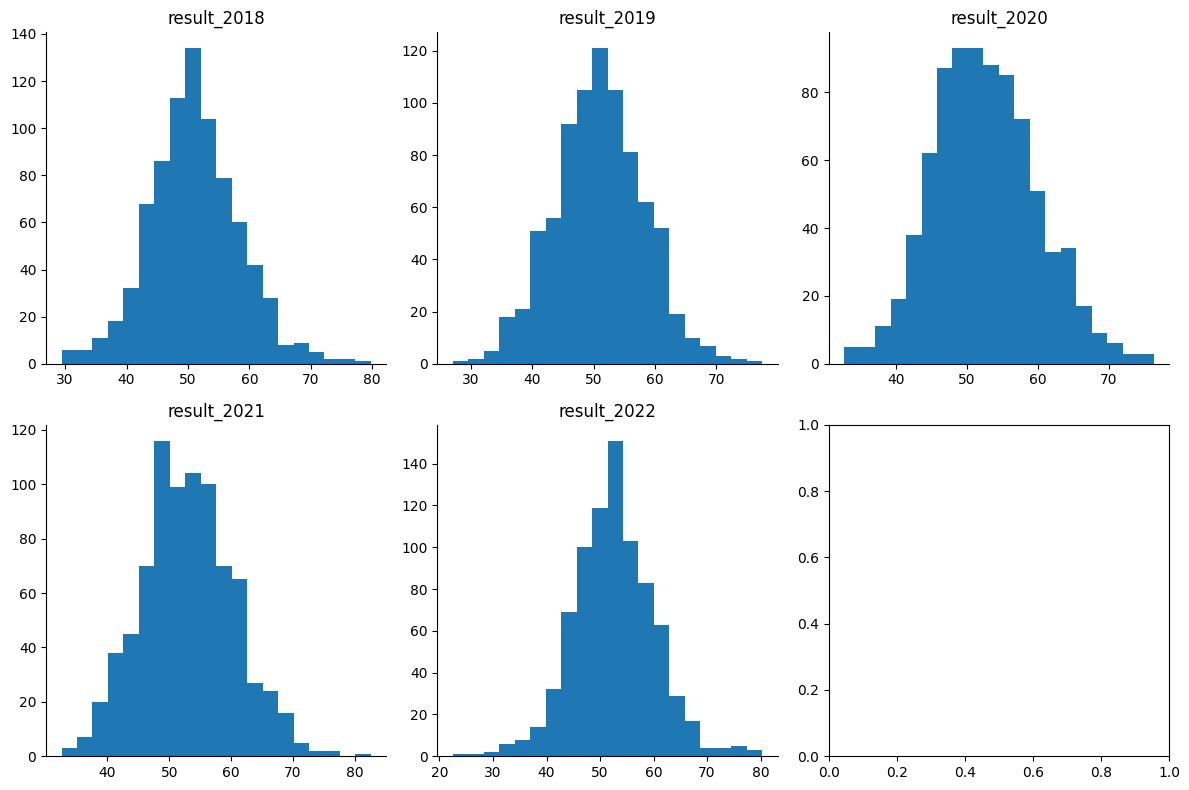

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

axes[0, 0].hist(filtered_frame['result_2018'], bins=20)
axes[0, 0].set_title('result_2018')
axes[0, 0].spines[['top', 'right']].set_visible(False)

axes[0, 1].hist(filtered_frame['result_2019'], bins=20)
axes[0, 1].set_title('result_2019')
axes[0, 1].spines[['top', 'right']].set_visible(False)

axes[0, 2].hist(filtered_frame['result_2020'], bins=20)
axes[0, 2].set_title('result_2020')
axes[0, 2].spines[['top', 'right']].set_visible(False)

axes[1, 0].hist(filtered_frame['result_2021'], bins=20)
axes[1, 0].set_title('result_2021')
axes[1, 0].spines[['top', 'right']].set_visible(False)

axes[1, 1].hist(filtered_frame['result_2022'], bins=20)
axes[1, 1].set_title('result_2022')
axes[1, 1].spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()



# Сохранение данных по отдельным годам

Отдельно сохраним данные по каждому году:

In [ ]:
rows_2018 = []

for index, row in original_df.iterrows():
    if (np.isnan(row['result_2018'])):
      continue
    else:
        rows_2018.append(index)

dummy = original_df.loc[rows_2018]
altman_2018 = {}
altman_2018 = pd.DataFrame()
altman_2018['index_column'] = dummy['index_column']
altman_2018['result_2018'] = dummy['result_2018']
altman_2018

,index_column,result_2018
218,218,57.258404
784,784,53.867323
1975,1975,55.455416
13333,13333,58.853014
13639,13639,54.007276
...,...,...
160913,160913,57.185277
160924,160924,50.337671
160927,160927,54.532100
160928,160928,69.081559


In [ ]:
rows_2019 = []

for index, row in original_df.iterrows():
    if (np.isnan(row['result_2019'])):
      continue
    else:
        rows_2019.append(index)

dummy = original_df.loc[rows_2019]
altman_2019 = {}
altman_2019 = pd.DataFrame()
altman_2019['index_column'] = dummy['index_column']
altman_2019['result_2019'] = dummy['result_2019']
altman_2019

,index_column,result_2019
218,218,60.137515
784,784,61.296198
7131,7131,45.709258
10198,10198,37.432879
11304,11304,51.034215
...,...,...
160934,160934,48.334962
160938,160938,43.682332
160949,160949,48.008608
160960,160960,54.478891


In [ ]:
rows_2020 = []

for index, row in original_df.iterrows():
    if (np.isnan(row['result_2020'])):
      continue
    else:
        rows_2020.append(index)

dummy = original_df.loc[rows_2020]
altman_2020 = {}
altman_2020 = pd.DataFrame()
altman_2020['index_column'] = dummy['index_column']
altman_2020['result_2020'] = dummy['result_2020']
altman_2020

,index_column,result_2020
11304,11304,50.740656
13333,13333,54.650259
13639,13639,45.835641
13951,13951,63.994676
14887,14887,51.412607
...,...,...
160910,160910,63.271120
160924,160924,50.859251
160927,160927,66.280774
160934,160934,48.256540


In [ ]:
rows_2021 = []

for index, row in original_df.iterrows():
    if (np.isnan(row['result_2021'])):
      continue
    else:
        rows_2021.append(index)

dummy = original_df.loc[rows_2021]
altman_2021 = {}
altman_2021 = pd.DataFrame()
altman_2021['index_column'] = dummy['index_column']
altman_2021['result_2021'] = dummy['result_2021']
altman_2021

,index_column,result_2021
784,784,56.237859
11304,11304,46.409111
13333,13333,55.723564
13951,13951,60.721032
14103,14103,42.763717
...,...,...
160924,160924,46.318560
160927,160927,62.573572
160934,160934,47.881824
160949,160949,53.599729


In [ ]:
rows_2022 = []

for index, row in original_df.iterrows():
    if (np.isnan(row['result_2022'])):
      continue
    else:
        rows_2022.append(index)

dummy = original_df.loc[rows_2022]
altman_2022 = {}
altman_2022 = pd.DataFrame()
altman_2022['index_column'] = dummy['index_column']
altman_2022['result_2022'] = dummy['result_2022']
altman_2022

,index_column,result_2022
784,784,56.788247
1072,1072,56.017086
5247,5247,47.452234
8367,8367,57.302853
9629,9629,59.751385
...,...,...
160928,160928,64.324757
160934,160934,51.094410
160949,160949,47.172677
160960,160960,67.907853


Вывод о количествах компаний, доступных для анализа в каждый, по годам:

* **2018** год,
количество компаний =  2030

* **2019** год,
количество компаний =  2151

* **2020** год,
количество компаний =  2187

* **2021** год,
количество компаний =  2188

* **2022** год,
количество компаний =  2681


Сохраним значения Альтмана, которые считаются для всех периодов (панельные данные)

In [ ]:
result = {}
result = pd.DataFrame()
for year in range(2018, 2023):
    result['index_column'] = filtered_frame['index_column']
    result[f'result_{year}'] = filtered_frame[f'result_{year}']

result

,index_column,result_2018,result_2019,result_2020,result_2021,result_2022
13333,13333,58.853014,47.162188,54.650259,55.723564,52.592245
13951,13951,44.327714,54.043415,63.994676,60.721032,50.022248
32840,32840,46.501760,48.941816,57.880998,68.172145,72.630547
37723,37723,53.084890,60.158125,47.371356,57.767874,55.000570
50831,50831,43.742576,44.190868,48.401878,49.510935,46.364716
...,...,...,...,...,...,...
160799,160799,63.749443,68.025688,69.988335,66.763095,58.222622
160891,160891,79.790352,69.581279,67.146026,67.401769,66.785925
160910,160910,53.439743,60.808089,63.271120,57.619734,61.490676
160924,160924,50.337671,45.434377,50.859251,46.318560,52.542067


Сохраним таблицы с рассчитанной моделью Альтмана для 2018-2022 годов

In [ ]:
altman_2018.to_excel("/content/drive/MyDrive/ИПС/Альтман по годам/Альтман_2018.xlsx", index=False)
altman_2019.to_excel("/content/drive/MyDrive/ИПС/Альтман по годам/Альтман_2019.xlsx", index=False)
altman_2020.to_excel("/content/drive/MyDrive/ИПС/Альтман по годам/Альтман_2020.xlsx", index=False)
altman_2021.to_excel("/content/drive/MyDrive/ИПС/Альтман по годам/Альтман_2021.xlsx", index=False)
altman_2022.to_excel("/content/drive/MyDrive/ИПС/Альтман по годам/Альтман_2022.xlsx", index=False)

Также сохраним таблицу с панельными данными

In [ ]:
result.to_excel("/content/drive/MyDrive/ИПС/Данные/Финальные результаты модели Альтмана.xlsx", index=False)